In [127]:
#импорт данных
import pandas as pd
import numpy as np

df = pd.read_csv('auto.csv')  
types = ['седан', 'хэтчбек', 'кроссовер', 'внедорожник']

In [128]:
#удаление экземпляров, которые не входят в типы для предсказания
for i in range(0 , len(df['type_car'])):
    for word in df['type_car'][i].lower().split():
        flag = True
        if word in types:
            flag = False
            df.at[i, 'type_car'] = word
            break
    if flag: df = df.drop(i)
df = df.reset_index()
df = df.drop(columns=['index'])

In [129]:
#преобразование переменных
for i in range(0 , len(df)):
    try:
        df.at[i, 'Мощность'] =  int(df.iloc[i]['Мощность'].split()[0])
    except ValueError:
        pass
        
    try:
        df.at[i, 'Крутящий момент двигателя'] = int(df.iloc[i]['Крутящий момент двигателя'].split()[0])
    except ValueError:
        pass
    try:
        df.at[i, 'Разгон до сотни'] = float(df.iloc[i]['Разгон до сотни'].split()[0])
    except ValueError:
        pass
    
    try:
        df.at[i, 'Максимальная скорость'] = int(df.iloc[i]['Максимальная скорость'].split()[0])
    except ValueError:
        pass
    
    try:
        df.at[i, 'Дорожный просвет'] = int(df.iloc[i]['Дорожный просвет'].split()[0])
    except ValueError:
        pass
    
    try:
        df.at[i, 'Колёсная база'] = int(df.iloc[i]['Колёсная база'].split()[0])
    except ValueError:
        pass
    
    try:
        df.at[i, 'Объём багажника'] = int(df.iloc[i]['Объём багажника'].split()[0])
    except ValueError:
        pass
    
    try:
        df.at[i, 'Объём багажника максимальный'] = int(df.iloc[i]['Объём багажника максимальный'].split()[0])
    except ValueError:
        pass
    
    try:
        df.at[i, 'Объём топливного бака'] = int(df.iloc[i]['Объём топливного бака'].split()[0])
    except ValueError:
        pass
    
    try:
        df.at[i, 'Масса автомобиля'] = int(df.iloc[i]['Масса автомобиля'].split()[0])
    except ValueError:
        pass

In [130]:
#преобразование переменных

lenght = []
width = []
height = []


engine_type = []
engine_volume = []

transmission_type = []
transmission_speed_num = []

for i in range(0 , len(df)):
    
    #Габариты
    dim = df.at[i,'Габариты (длина × ширина × высота)'].split(' × ')
    lenght.append(dim[0])
    width.append(dim[1])
    height.append(dim[2])
    
    #Расход топлива
    df.at[i, 'Расход топлива (л/100 км)\nгород / трасса / смешанный'] = \
    float(df.iloc[i]['Расход топлива (л/100 км)\nгород / трасса / смешанный'].split(' / ')[2])
    
    #Двигатель
    engine_type.append(df['Двигатель'][i].split()[0])
    engine_volume.append(int(df['Двигатель'][i].split()[1][1:]))
    
    #Трансмиссия
    transmission_type.append(df['Коробка передач'][i].split()[0])
    transmission_speed_num.append(int(df['Коробка передач'][i].split()[1][1:]))

    
    
df['transmission_type'] = transmission_type
df['transmission_speed_num'] = transmission_speed_num
df = df.drop(columns = ['Коробка передач'])
    
    

df['engine_type'] = engine_type
df['engine_volume'] = engine_volume
df = df.drop(columns = ['Двигатель'])
    
    

df['Длина'] = lenght
df['Ширина'] = width
df['Высота'] = height

df = df.drop(columns=['Габариты (длина × ширина × высота)'])

In [131]:
#приведение категориальных типов данных к числовому
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['Привод'])
df['drive unit'] = le.transform(df['Привод'])

le.fit(df['engine_type'])
df['engine_type_num'] = le.transform(df['engine_type'])

le.fit(df['transmission_type'])
df['transmission_type_num'] = le.transform(df['transmission_type'])


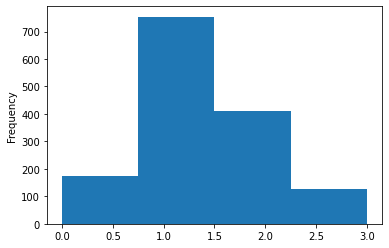

In [132]:
#построение гистограммы распределения типов кузова машин
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['type_car'])
df['numeric_type_car'] = le.transform(df['type_car'])

ax = df['numeric_type_car'].plot.hist(bins=4, alpha=1)

In [133]:
#приведение типов данных

df.loc[df['Разгон до сотни']=='нет данных','Разгон до сотни'] = np.nan

df = df.astype({'Мощность': 'int32',
          'Крутящий момент двигателя': 'int32',
           'Разгон до сотни': 'float',
           'Максимальная скорость': 'int32',
           'Расход топлива (л/100 км)\nгород / трасса / смешанный': 'float',
           'Дорожный просвет': 'int32',
           'Колёсная база': 'int32',
           'Объём багажника': 'int32',
           'Объём багажника максимальный': 'int32',
           'Объём топливного бака': 'int32',
           'Масса автомобиля': 'int32',
           'Длина': 'int32',
           'Ширина': 'int32',
           'Высота': 'int32',
           'engine_volume': 'int32',
           'transmission_speed_num': 'int32',
           'engine_type_num': 'int32',
           'transmission_type_num': 'int32'})



In [134]:
# в исходном наборе данных имеются пропущенные значения 
# есть 2 выхода - убрать данные экзмепляры из набора или заполнить их
# один из вариантов заполнения - заполнить пропуски средним значением по столбцу

#замена нулевых значений на среднее для столбца 'Разгон до сотни'
means = np.nanmean(df['Разгон до сотни'], axis=0)
df['Разгон до сотни'] = df['Разгон до сотни'].fillna(np.round(means, 2))

#замена нулевых значений на среднее для столбца 'Расход топлива (л/100 км)\nгород / трасса / смешанный'
df.loc[df['Расход топлива (л/100 км)\nгород / трасса / смешанный']==0,
       'Расход топлива (л/100 км)\nгород / трасса / смешанный'] = np.nan
means1 = np.nanmean(df['Расход топлива (л/100 км)\nгород / трасса / смешанный'], axis=0)

df['Расход топлива (л/100 км)\nгород / трасса / смешанный'] = \
df['Расход топлива (л/100 км)\nгород / трасса / смешанный'].fillna(np.round(means1, 2))

#замена нулевых значений на среднее для столбца 'Дорожный просвет'
df.loc[df['Дорожный просвет']==0,'Дорожный просвет'] = np.nan
means2 = np.nanmean(df['Дорожный просвет'], axis=0)
df['Дорожный просвет'] = df['Дорожный просвет'].fillna(int(np.round(means2, 0)))

In [135]:
#отбор фич
# рассмторим 2 метода - 
# Метод 1 - RFE Recursive feature elimination
# Цель рекурсивного исключения признаков (RFE) состоит в том, 
# чтобы выбрать признаки путем рекурсивного рассмотрения все меньших и меньших наборов признаков.
# Затем наименее важные фичи удаляются из текущего набора признаков. 
# Эта процедура рекурсивно повторяется для сокращенного набора,
# пока не будет достигнуто желаемое количество признаков.

from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False)
rfe = RFE(estimator=lsvc, n_features_to_select=15, step=1)
rfe.fit(scaler.transform(X), y)
ranking = rfe.ranking_
ranking
rfe.support_


array([ True,  True, False,  True,  True,  True, False,  True, False,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True, False,  True])

In [136]:
#model 2 - L1-based feature selection
# Линейные модели с использованием L1 регуляризации имеют некоторые оценочные кф. равные 0.
# Поэтому для уменьшения количества признаков данный метод можно использовать 
# вместе с SelectFromModel для выбора ненулевых коэффициентов.
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(scaler.transform(X), y)
model = SelectFromModel(lsvc, prefit=True)
model.get_support()

array([ True,  True, False,  True,  True, False, False,  True, False,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True, False,  True])

In [137]:
#на основании работы методов и знаний в предметной области выберет следующие признаки для обучения

X_new = df[['seats','doors', 'Крутящий момент двигателя', 
       'Максимальная скорость', 'Разгон до сотни',
       'Дорожный просвет', 'Объём багажника',
       'Объём багажника максимальный', 'Объём топливного бака',
       'Длина', 'Ширина', 'Высота', 'transmission_speed_num',
       'drive unit', 'transmission_type_num']]

In [138]:
# Обучение классификатора
# Для обучения выбран метод опорных векторов - один из самых популярных алгоритмов для решения задачи классификации.
# В качестве параметров модели выберем полиномиальное ядро с максимальным коэффициентом многочлена = 5.
# Также воспользуемся методом библиотеки sklearn для разделения выборки на тренировочную и тестовую, 
# где доля тестовой составляет 30%

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

clf = make_pipeline(StandardScaler(), SVC(kernel='poly', coef0=5, gamma='auto'))
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
print('Точность модели ', np.round(np.mean(predicted == y_test), 4))

Точность модели  0.9887


In [139]:
# оценка качества модели
from sklearn import metrics
report = metrics.classification_report(y_test, predicted, output_dict=True)

print(metrics.classification_report(y_test, predicted))
report_df = pd.DataFrame(report).transpose()

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        47
           1       1.00      0.98      0.99       230
           2       1.00      1.00      1.00       126
           3       0.97      0.97      0.97        38

    accuracy                           0.99       441
   macro avg       0.98      0.99      0.98       441
weighted avg       0.99      0.99      0.99       441

